<a href="https://colab.research.google.com/github/ropholuo/ESE546-Intro-to-Deep-learning/blob/main/Jinhui_hw1_problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Collaborator: Zhuopin Zhou (zhuopinz@seas)**

# (a)

**Download dataset**

In [ ]:
import torchvision as thv
train = thv.datasets.MNIST('./', download=True, train=True)
val = thv.datasets.MNIST('./', download=True, train=False)
print(train.data.shape, len(train.targets))

**Function for gernerating dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def datasetConstructor(x, y, train_size, test_size):
  # find the number of classes and number of samples in each class
  num_class = np.unique(y)
  num_count = {catagory: sum(y==catagory) for catagory in num_class}

  # find the indexes of every samples in each class
  sample_index = {}
  for i, catagory in enumerate(num_class):
    index = [j for j, num in enumerate(y) if num==catagory]
    sample_index[i] = index

  # randomly choose samples in every class
  x_train, x_val, y_train, y_val = [], [], [], []
  train_idx, test_idx = [], []
  for catagory, idx in sample_index.items():
    np.random.shuffle(idx)
    class_trainidx = idx[:int(train_size*len(idx))]
    class_testidx = idx[int(train_size*len(idx)):int((train_size+test_size)*len(idx))]
    train_idx += class_trainidx
    test_idx += class_testidx

  x_train = x[train_idx]
  x_val = x[test_idx]
  y_train = y[train_idx]
  y_val = y[test_idx]

  return x_train, x_val, y_train, y_val

**Use the function to generate smaller dataset**

In [ ]:
x_train, _, y_train, _ = datasetConstructor(train.data, train.targets, 0.5, 0)
_, x_val, _, y_val = datasetConstructor(val.data, val.targets, 0, 0.5)

In [ ]:
plt.figure(); plt.imshow(x_train[0])
plt.figure(); plt.imshow(x_train[5])

# (b)
**Linear Layer**

In [ ]:
class linear_t:
    def __init__(self):
        # initialize to appropriate sizes, fill with Gaussian entires
        # normalize to make the Frobenius norm of w, b equal to 1
        w_ran = np.random.normal(size = (10, 784))
        b_ran = np.random.normal(size = (1, 10))

        self.w = w_ran / np.linalg.norm(w_ran, 'fro')
        self.b = b_ran / np.linalg.norm(b_ran, 'fro')
        self.dw = np.zeros(np.shape(self.w))
        self.db = np.zeros(np.shape(self.b))

    def forward(self, h_l):
        h_l1 = np.matmul(h_l, np.transpose(self.w)) + self.b
        self.hl = h_l
        
        return h_l1

    def backward(self, dh_l1):
        dh_l = np.matmul(dh_l1, self.w)
        dw = np.matmul(np.transpose(dh_l1), self.hl) / dh_l1.shape[0]
        db = np.mean(dh_l1, axis=0)

        self.dw, self.db = dw, db

        return dh_l

    def zero_grad(self):
        self.dw, self.db = 0*self.dw, 0*self.db


# (c)

In [ ]:
class relu_t:
    def __init__(self):
        pass

    def forward(self, h_l):
        h_l1 = np.maximum(0, h_l)
        self.hl = h_l

        return h_l1

    def backward(self, dh_l1):
        dh_l = dh_l1 * (self.hl > 0)

        return dh_l


# (D)

In [ ]:
class softmax_cross_entropy_t:
    def __init__(self) -> None:
        pass

    def forward(self, h_l, y):
        self.y = y
        self.h_l1 = np.exp(h_l) / np.sum(np.exp(h_l), axis=1).reshape(-1,1)
        # self.h_y = self.h_l1[range(self.h_l1.shape[0]), self.y[:,None]]
        loss = (np.log(self.h_l1) * (self.y[:,None] == np.arange(10))).sum(axis=1)
        ell = -np.mean(loss)
        error = 1 / len(y) * np.sum(self.y != np.argmax(self.h_l1, axis=1))

        return ell, error
    
    def backward(self):
        dh_l = self.h_l1 - (self.y[:,None] == np.arange(10))

        return dh_l

# (e)

In [ ]:
# check linear layer

for i in range(10):
    for j in range(5):
        eps = np.zeros((10, 784)); eps[0,j] = np.random.normal(size = (1,1))
        h_l = np.random.normal(size = (1,784))
        dh_l1 = np.zeros((1,10)); dh_l1[0,j] = 1
        linear = linear_t()
        linear.forward(h_l)
        linear.backward(dh_l1)
        w = linear.w
        dw = linear.dw
        dw_es = ((np.matmul(h_l, np.transpose(w + eps)) 
                                - np.matmul(h_l, np.transpose(w - eps)))
                                / (2 * eps[0,j]))
        
        print(np.sum(dw[0,j] - dw_es[0,j]))


with 50 iterations, the differences between the calculated gradient and the estimaiton are all close to 0, thus the linear layer is implemented correctly.

In [ ]:
# check relu layer

for i in range(5):
    eps = np.zeros((1,10)); eps[0,i] = np.random.normal(size = (1,1))
    h_l = np.random.normal(size = (1,10))
    dh_l1 = np.zeros((1,10)); dh_l1[0,i] = 1
    relu = relu_t()
    relu.forward(h_l)
    dh_l = relu.backward(dh_l1)
    dh_l_es = (np.maximum(0, h_l + eps) - np.maximum(0, h_l - eps)) / (2 * eps[0,i])
    
    print(dh_l)
    print(dh_l_es)

with 5 iterations, only the results out of 1 case are not similiar, which is acceptable.

In [ ]:
# check 

# (f) & (g)

In [ ]:
# initialize the datasets
import torchvision as thv
train = thv.datasets.MNIST('./', download=True, train=True)
val = thv.datasets.MNIST('./', download=True, train=False)
print(train.data.shape, len(train.targets))

x_train, _, y_train, _ = datasetConstructor(train.data, train.targets, 0.5, 0)
_, x_val, _, y_val = datasetConstructor(val.data, val.targets, 0, 0.5)

x_train = np.array(x_train).reshape(-1,784)/255
x_val = np.array(x_val).reshape(-1,784)/255
y_train = np.array(y_train)
y_val = np.array(y_val)


torch.Size([60000, 28, 28]) 60000


In [ ]:

# initialize the layers
linear, relu, scn = linear_t(), relu_t(), softmax_cross_entropy_t()
net = [linear, relu, scn]
lr = 0.1
num_update = 50000
train_loss, train_error = np.ndarray(num_update // 1000), np.ndarray(num_update // 1000)
val_loss_list, val_error_list = [], []
# ell, error = np.zeros((1, num_update)), np.zeros((1, num_update))

def validate(w, b):

    loss, tot_error = 0, 0
    for i in range(0, 5000, 32):
        x, y = x_val[i:i+32], y_val[i:i+32]

        a = np.matmul(x, np.transpose(w)) + b
        bb = relu.forward(a)
        tot_error += np.sum(np.argmax(bb, axis=1) != y)
        c = np.exp(bb) / np.sum(np.exp(bb), axis=1).reshape(-1,1)
        loss = (np.log(c) * (y[:,None] == np.arange(10))).sum(axis=1)
        loss = -np.mean(loss)
        # print(ell, error)
    error = tot_error / 5000

    print(loss, error)
    return loss, error
    # print(val_loss, val_error)  
    # update = list(range(7))


0 2.32330925686373 0.90625
2.540980537624747 0.8988
1 2.3101504180090333 0.875
2 2.1705830115069817 0.6875
3 2.0816841682194926 0.4375
4 1.850695945230109 0.4375
5 2.0569712067477512 0.71875
6 1.9634931548195476 0.59375
7 1.7369938012773816 0.34375
8 1.720585357919866 0.34375
9 1.753736589593796 0.5
10 1.709191485490301 0.375
11 1.6791830450455745 0.4375
12 1.7147690935421513 0.3125
13 1.576309934404629 0.375
14 1.507525963346877 0.21875
15 1.4549489966441587 0.3125
16 1.5169902825945374 0.34375
17 1.511043688783276 0.4375
18 1.3582061606754392 0.34375
19 1.3447189337322354 0.25
20 1.3954379849149696 0.375
21 1.3850765628590151 0.3125
22 1.0372646665433929 0.1875
23 1.242552335602922 0.21875
24 1.3119525410989588 0.25
25 1.316837273103474 0.4375
26 1.1958319231447812 0.28125
27 1.1957363854787457 0.3125
28 0.9194020708317503 0.15625
29 1.1428664530496857 0.21875
30 0.9297338452514314 0.125
31 1.0134784892362019 0.15625
32 1.183239018825652 0.3125
33 1.3274133804881456 0.3125
34 0.88773

Text(0, 0.5, 'training error')

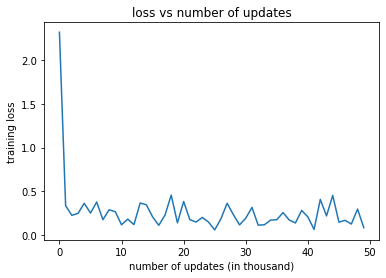

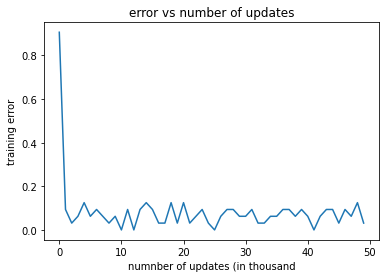

In [ ]:

# train 1000 iterations
for t in range(num_update):
    idx = np.random.choice(x_train.shape[0], size = 32)
    x, y = x_train[idx], y_train[idx]

    for l in net:
        try:
            l.zero_grad()
        except:
            pass
        
    # 3. forward pass
    h1 = linear.forward(x)
    h2 = relu.forward(h1)
    ell, error = scn.forward(h2, y)

    # 4. backward pass
    dh2 = scn.backward()
    dh1 = relu.backward(dh2)
    dx = linear.backward(dh1)

    # 5. gather backprop gradients
    dw, db = linear.dw, linear.db

    # 6. print quantites
    print(t, ell, error)
    # print(t, np.linalg.norm(dw/linear.w), np.linalg.norm(db/linear.b))
    if t % 1000 == 0:
        train_loss[t // 1000] = ell
        train_error[t // 1000] = error
        val_loss, val_error = validate(linear.w, linear.b)
        val_loss_list.append(val_loss)
        val_error_list.append(val_error)

    # 7. one step for SGD
    linear.w = linear.w - lr * dw
    linear.b = linear.b - lr * db

    

update = list(range(num_update // 1000))
plt.figure(); plt.plot(update, train_loss); plt.title('loss vs number of updates')
plt.xlabel('number of updates (in thousand)'); plt.ylabel('training loss')
plt.figure(); plt.plot(update, train_error); plt.title('error vs number of updates')
plt.xlabel('numnber of updates (in thousand'); plt.ylabel('training error')


Text(0, 0.5, 'validation error')

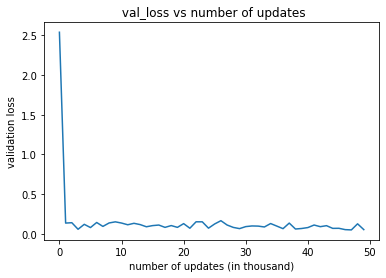

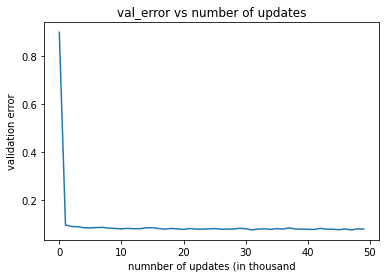

In [ ]:
plt.figure(); plt.plot(update, val_loss_list); plt.title(' val_loss vs number of updates')
plt.xlabel('number of updates (in thousand)'); plt.ylabel('validation loss')
plt.figure(); plt.plot(update, val_error_list); plt.title('val_error vs number of updates')
plt.xlabel('numnber of updates (in thousand'); plt.ylabel('validation error')

# (h)

In [ ]:
# initialize the datasets
import torchvision as thv
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
train = thv.datasets.MNIST('./', download=True, train=True, transform=ToTensor())
val = thv.datasets.MNIST('./', download=True, train=False, transform=ToTensor())
print(train.data.shape, len(train.targets))

batch_size = 32
train_dataloader = DataLoader(train, batch_size=batch_size)
test_dataloader = DataLoader(val, batch_size=batch_size)

torch.Size([60000, 28, 28]) 60000


In [ ]:
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 10),
      nn.ReLU(),
    )


  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)

    return logits

model = Net()
print(model)


Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): ReLU()
  )
)


In [ ]:

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss = nn.CrossEntropyLoss()

In [ ]:

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
          
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss, optimizer)
    test(test_dataloader, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316111  [    0/60000]
loss: 0.918792  [ 3200/60000]
loss: 0.539684  [ 6400/60000]
loss: 0.517617  [ 9600/60000]
loss: 0.514827  [12800/60000]
loss: 0.618626  [16000/60000]
loss: 0.654122  [19200/60000]
loss: 0.322579  [22400/60000]
loss: 0.287758  [25600/60000]
loss: 0.216043  [28800/60000]
loss: 0.455471  [32000/60000]
loss: 0.316692  [35200/60000]
loss: 0.330435  [38400/60000]
loss: 0.405674  [41600/60000]
loss: 0.330569  [44800/60000]
loss: 0.236692  [48000/60000]
loss: 0.406657  [51200/60000]
loss: 0.198125  [54400/60000]
loss: 0.318843  [57600/60000]
Test Error: 
 Accuracy: 91.1%, Avg loss: 0.318100 

Epoch 2
-------------------------------
loss: 0.277407  [    0/60000]
loss: 0.464845  [ 3200/60000]
loss: 0.338889  [ 6400/60000]
loss: 0.162619  [ 9600/60000]
loss: 0.213460  [12800/60000]
loss: 0.382255  [16000/60000]
loss: 0.296218  [19200/60000]
loss: 0.210544  [22400/60000]
loss: 0.221620  [25600/60000]
loss: 0.138759  [28800/60000

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth
